<div style="text-align: center; margin: 50px">

<h1 style="text-align: center;">Superdense Coding</h1>

</div>

### Overview:
[Importing Necessary Libraries and Provider](#part1)<br><br>
[Superdense Coding](#sdc)<br>
   1. [Steps Involved](#sdc_1)<br>
     a.[Preparation](#sdc1)<br>
     b.[Seperation](#sdc2)<br>
     c.[Encoding](#sdc3)<br>
     d.[Transmission](#sdc4)<br> 
     e.[Decoding](#sdc5)<br>
   2. [The Complete Protocol](#sdc_2)<br><br>


In [1]:
import numpy as np
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit_textbook.tools import array_to_latex, random_state
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_textbook.tools import random_state, array_to_latex
import qiskit as q
%matplotlib inline

<a id = 'sdc'></a>
## Superdense Coding:

<a id = 'sdc_1'></a>
### Steps Involved
#### 5 steps:
**1. Preparation:** Prepare $ |\phi^+\rangle : \frac{1}{\sqrt2}\big(|00\rangle + |11\rangle\big) $ (by convention) state; split the two pair among sender and receiver. <br><br>
**2. Transport:** Sender physically moves away with h(is/er) pair of entangled qubit. <br><br>
**3. Encoding:** Sender encodes classical bits of information to h(is/er) pair of qubit. <br><br>
**4. Transmission:** Sender transmits h(is/er) qubit to receiver. <br><br>
**5. Decoding:** Receiver decodes and measures h(is/er) qubit to retrieve sender's classical state. <br> 

<a id = 'sdc1'></a>
#### Preparation

In [2]:
def preparation(qc):
    qc.h(0)
    qc.cx(0,1)

<a id = 'sdc2'></a>
#### Seperation

In [3]:
## Sender takes q0 and receiver takes q1, they travel far apart.

def seperation(qc):
    qc.barrier()

<a id = 'sdc3'></a>
#### Encoding

| Intended Message | Gate Sender Applies | Resulting State |
|:----------------:|:--------------------------:|:---------------:|
| 00 | $$I$$ | $$\tfrac{1}{\sqrt{2}}\big(|00\rangle+|11\rangle\big)=|\Phi^+\rangle$$ |
| 10 | $$X$$ | $$\tfrac{1}{\sqrt{2}}\big(|01\rangle+|10\rangle\big)=|\Psi^+\rangle$$ |
| 01 | $$Z$$ | $$\tfrac{1}{\sqrt{2}}\big(|00\rangle-|11\rangle\big)=|\Phi^-\rangle$$ |
| 11 | $$X\cdot Z$$ | $$\tfrac{1}{\sqrt{2}}\big(-|01\rangle+|10\rangle\big)=-|\Psi^-\rangle$$ |

(By convention)

In [4]:
## Sender can manipulate h(is/er) part of entangled qubits to encode 2 bits of classical information

# def encoding(qc, message):
#     message = input('Enter your intended message from 00, 01, 10 and 11:  ')
#     if message == '00':
#         pass
#     elif message == '01':
#         qc.z(0)
#     elif message == '10':
#         qc.x(0)
#     elif message == '11':
#         qc.x(0)
#         qc.z(0)
#     else:
#         print('Invalid message: Sending '00'.')

def state_00(qc):
    pass

def state_01(qc):
    qc.z(0)

def state_10(qc):
    qc.x(0)
    
def state_11(qc):
    qc.x(0)
    qc.z(0)

def encoding(qc):
    message = input('Enter your intended message from 00, 01, 10 and 11 :   ')
    if message == '00':
        state_00(qc)
    elif message == '01':
        state_01(qc)
    elif message == '10':
        state_10(qc)
    elif message == '11':
        state_11(qc)
    else:
        print('Invalid message: Sending 00')

<a id = 'sdc4'></a>
#### Transmission

In [5]:
## Sender sends h(is/er) encoded qubit physically to receiver.
def transmission(qc):
    qc.barrier()

<a id = 'sdc5'></a>
#### Decoding

| Receiver Receives | After CNOT gate | After H gate | Classical bits after measurement
|:------------:|:----------------:|:------------:|:------------:|
| $$|00\rangle+|11\rangle$$ | $$|00\rangle+|01\rangle$$ | $$|00\rangle$$ | 00 |
| $$|01\rangle+|10\rangle$$ | $$|11\rangle+|10\rangle$$ | $$|10\rangle$$ | 10 |
| $$|00\rangle-|11\rangle$$ | $$|00\rangle-|01\rangle$$ | $$|01\rangle$$ | 01 |
| $$-|01\rangle+|10\rangle$$ | $$-|11\rangle+|10\rangle$$ | $$-|11\rangle$$ | 11 |



In [6]:
## Receiver bell-measures their qubits to retreive the encoded classical bits information:

def bell_measure(qc):
    qc.cx(0,1)
    qc.h(0)
    qc.measure(range(2),range(2))
    display(qc.draw('mpl'))
## Retrieving Information:
    backend_sim = Aer.get_backend('statevector_simulator')
#     backend_real_qc = least_busy(provider.backends(filters = lambda x: x.configuration().n_qubits >= 2
#                                           and not x.configuration().simulator
#                                           and x.status().operational == True))
#     print("Running on: ", backend_real_qc)
#     job = execute(qc,backend_real_qc)
    job = execute(qc,backend_sim)
    result = job.result()
    counts = result.get_counts(qc)
    received = dict([(value,key) for key,value in counts.items()])
    print('Message received: {} '.format(received[1]))
    display(plot_histogram(counts))

<a id = 'sdc_2'></a>
### Superdense Coding: The Complete Protocol

Enter your intended message from 00, 01, 10 and 11 :   11


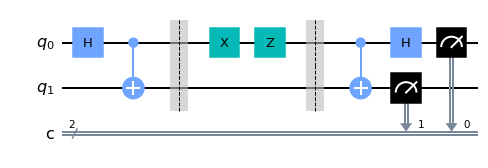

Message received: 11 


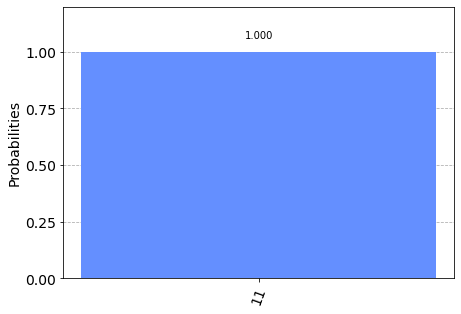

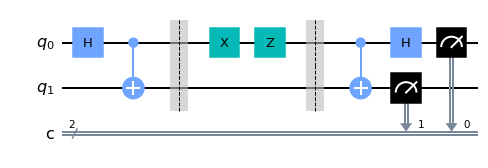

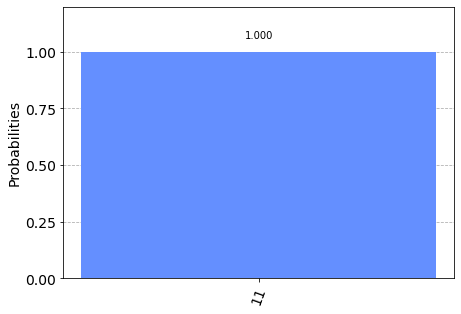

In [7]:
## Initializing:
qc_test = QuantumCircuit(2,2)

## Preparing entangled state:
preparation(qc_test)

## Sender Receiver moves apart:
seperation(qc_test)

## Sender encodes h(is/er) qubit according to intended 2 bits of classical information:
encoding(qc_test)

## Sender transmits h(is/er) encoded qubit physically to receiver:
transmission(qc_test)

# Receiver performs bell-measurement on both qubits to retrieve the encoded 2 bits of information:
bell_measure(qc_test)